In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
#DATA PLOTS AND CODE FOR SIMPLE RANDOM WALK3
# Read the text file with three columns (x, y, z)
filename = 'SW.txt'  # Replace 'data.txt' with your file's name
data = np.loadtxt(filename, delimiter=' ')  # Use space as the delimiter
# Extract the columns
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]
error = data[:,4]
error_Rn = data[:,5]
log_error = error/y
log_error_Rn = error_Rn/z
# Compute the logarithms
log_x = np.log(x)
log_y = np.log(y)
log_z = np.log(z)

slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)
print(f'Slope of the linearized data: {slope:.2f}')
# Create two subplots for the plots
plt.figure(figsize=(12, 6))

# Plot log(<Rn^2>) vs log(N)
plt.subplot(121)
plt.scatter(log_x, log_y, marker='o', label='log(<Rn^2>) vs log(N)')
plt.errorbar(log_x, log_y, yerr=log_error, fmt='o', capsize=5, label='Error Bars')
plt.xlabel('log(N)')
plt.ylabel('log(<Rn^2>)')
plt.legend()
plt.tight_layout()


plt.subplot(122)
plt.scatter(log_x, log_y, marker='o', label='log(<Rn^2>) vs log(N)')
plt.plot(log_x, slope * log_x + intercept, color = 'red', label =f'Slope : {slope:.2f}')
plt.xlabel('log(N)')
plt.ylabel('log(<Rn^2>)')
plt.legend()
plt.show()
# Plot log(<Rn>) vs log(N)



FileNotFoundError: SW.txt not found.

In [2]:
slope1, intercept1, r_value, p_value, std_err = linregress(log_x, log_z)

print(f'Slope of the linearized data: {slope:.2f}')
# Create two subplots for the plots
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(log_x, log_z, marker='o', label='log(<Rn>) vs log(N)')
plt.errorbar(log_x, log_z, yerr=log_error_Rn, fmt='o', capsize=5, label='Error Bars')
plt.xlabel('log(N)')
plt.ylabel('log(<Rn>)')
plt.legend()
plt.tight_layout()

plt.subplot(122)
plt.scatter(log_x, log_z, marker='o', label='log(<Rn>) vs log(N)')
plt.plot(log_x, slope1 * log_x + intercept1, color = 'red', label =f'Slope : {slope1:.2f}')
plt.xlabel('log(N)')
plt.ylabel('log(<Rn^2>)')
plt.legend()
plt.show()


NameError: name 'slope' is not defined

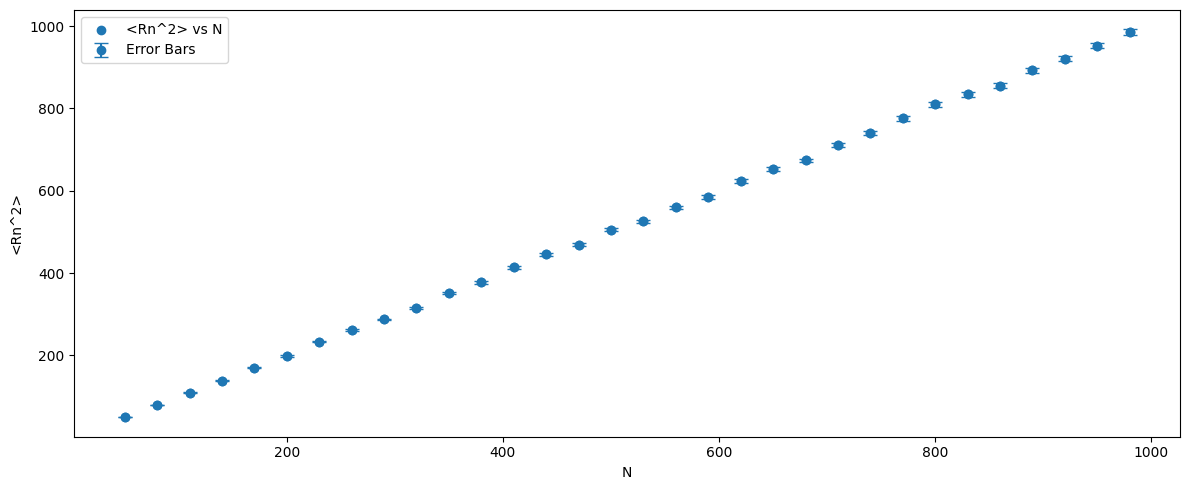

In [7]:
#DATA PLOTS AND CODE FOR SIMPLE RANDOM WALK3
# Read the text file with three columns (x, y, z)
filename = 'SW.txt'  # Replace 'data.txt' with your file's name
data = np.loadtxt(filename, delimiter=' ')  # Use space as the delimiter
# Extract the columns
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]
error = data[:,4]
error_Rn = data[:,5]
# Compute the logarithms
log_x = np.log(x)
log_y = np.log(y)
log_z = np.log(z)
# Create two subplots for the plots
plt.figure(figsize=(12, 5))

# Plot log(<Rn^2>) vs log(N)

plt.scatter(x, y, marker='o', label='<Rn^2> vs N')
plt.errorbar(x, y, yerr=error, fmt='o', capsize=5, label='Error Bars')
plt.xlabel('N')
plt.ylabel('<Rn^2>')
plt.legend()
plt.tight_layout()
#plt.show()


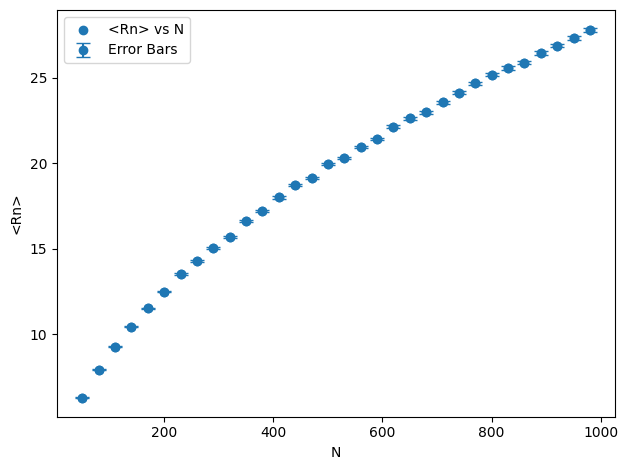

In [8]:
# Plot log(<Rn>) vs log(N)
plt.scatter(x, z, marker='o', label='<Rn> vs N')
plt.errorbar(x, z, yerr=error_Rn, fmt='o', capsize=5, label='Error Bars')
plt.xlabel('N')
plt.ylabel('<Rn>')
plt.legend()
plt.tight_layout()
plt.show()

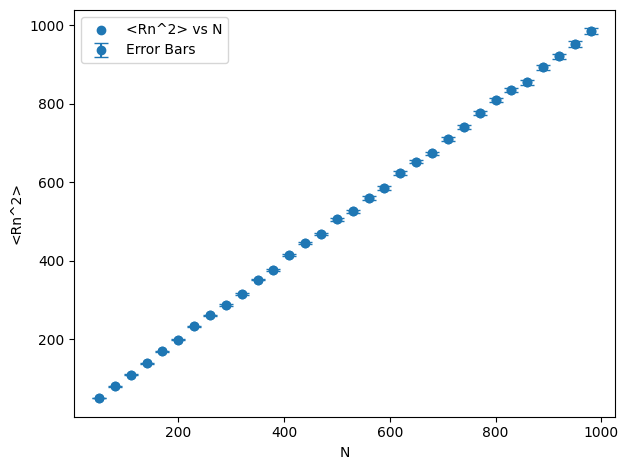

In [9]:

plt.scatter(x, y, marker='o', label='<Rn^2> vs N')
plt.errorbar(x, y, yerr=error, fmt='o', capsize=5, label='Error Bars')
plt.xlabel('N')
plt.ylabel('<Rn^2>')
plt.legend()
plt.tight_layout()
plt.show()

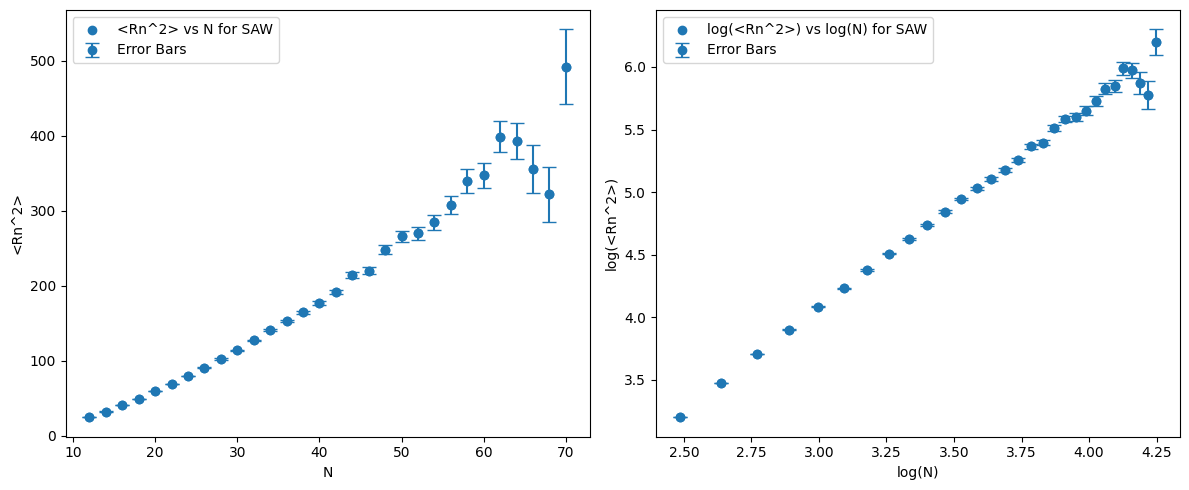

In [10]:
#DATA PLOTS AND CODE FOR NON REVERSING RANDOM WALK

# Read the text file with three columns (x, y, z)
filename = 'DataNRRW3.txt'  # Replace 'data.txt' with your file's name
data = np.loadtxt(filename, delimiter=' ')  # Use space as the delimiter
# Extract the columns
x = data[:, 0]
y = data[:, 1]
error = data[:,5]
log_error = error/y

# Compute the logarithms
log_x = np.log(x)
log_y = np.log(y)

# Create two subplots for the plots
plt.figure(figsize=(12, 5))
#SAW Generated by the NRRW Walk Approach

# Plot x = N  vs y = Average distance for each N
plt.subplot(121)
plt.scatter(x, y, marker='o', label='<Rn^2> vs N for SAW')
plt.errorbar(x, y, yerr=error, fmt='o', capsize=5, label='Error Bars')
plt.xlabel('N')
plt.ylabel('<Rn^2>')
plt.legend()
# Plot log(x) vs log(y)
plt.subplot(122)
plt.scatter(log_x, log_y, marker='o', label='log(<Rn^2>) vs log(N) for SAW')
plt.errorbar(log_x , log_y , yerr = log_error, fmt = 'o', capsize =5 , label ='Error Bars')
plt.xlabel('log(N)')
plt.ylabel('log(<Rn^2>)')
plt.legend()
plt.tight_layout()
plt.show()


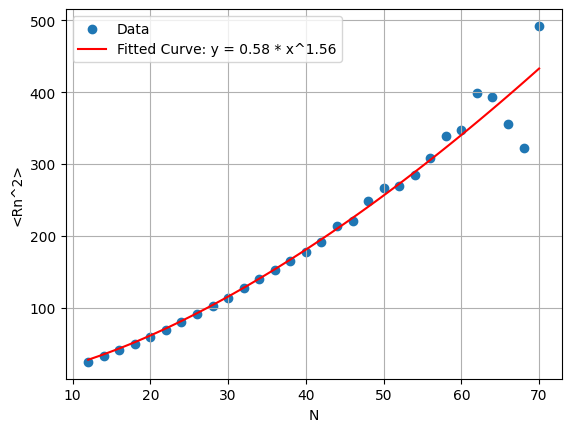

Fitted Parameters: D = 0.58, b = 1.56


In [11]:
# Read the text file with two columns (x, y)
filename = 'DataNRRW3.txt'  
data = np.loadtxt(filename, delimiter=' ')  

x_data = data[:, 0]
y_data = data[:, 1]
z_data = data[:,3]



def power_law(x, D, b):
    return D * np.power(x, b)

# Fit the power-law function to the data
params, covariance = curve_fit(power_law, x_data, y_data)

# Extract the fitted parameters
D_fit, b_fit = params

# Create a range of x values for plotting the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)

# Calculate the corresponding y values using the fitted parameters
y_fit = power_law(x_fit, D_fit, b_fit)

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Data', marker='o')
plt.plot(x_fit, y_fit, label=f'Fitted Curve: y = {D_fit:.2f} * x^{b_fit:.2f}', color='red')
plt.xlabel('N')
plt.ylabel('<Rn^2>')
plt.legend()
plt.grid(True)
plt.show()
# Print the fitted parameters
print(f"Fitted Parameters: D = {D_fit:.2f}, b = {b_fit:.2f}")

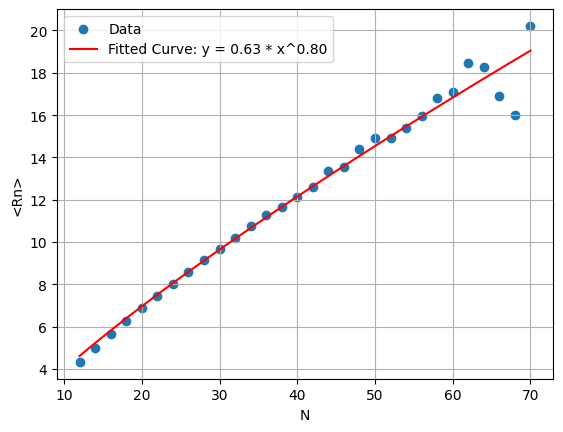

Fitted Parameters: D = 0.63, b = 0.80


In [14]:

x_data = data[:, 0]
y_data = data[:, 1]
z_data = data[:,3]



def power_law(x, D, b):
    return D * np.power(x, b)

# Fit the power-law function to the data
params, covariance = curve_fit(power_law, x_data, z_data)

# Extract the fitted parameters
D_fit, b_fit = params

# Create a range of x values for plotting the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)

# Calculate the corresponding y values using the fitted parameters
y_fit = power_law(x_fit, D_fit, b_fit)

# Plot the original data and the fitted curve
plt.scatter(x_data, z_data, label='Data', marker='o')
plt.plot(x_fit, y_fit, label=f'Fitted Curve: y = {D_fit:.2f} * x^{b_fit:.2f}', color='red')
plt.xlabel('N')
plt.ylabel('<Rn>')
plt.legend()
plt.grid(True)
plt.show()
# Print the fitted parameters
print(f"Fitted Parameters: D = {D_fit:.2f}, b = {b_fit:.2f}")

In [1]:
#DATA PLOTS AND CODE FOR NON REVERSING RANDOM WALK
# Read the text file with three columns (x, y, z)
filename = 'DataNRRW3.txt'  # Replace with your file's name
data = np.loadtxt(filename, delimiter=' ')  # Use space as the delimiter

x = data[:, 0]
xx = data[:, 2]
x1 = 1 / x
xx1 = xx ** (x1)

slope, intercept = np.polyfit(x1, xx1, 1)

print(f'Slope of the fitted line: {slope:.2f}')

# Create two subplots for the plots
plt.figure(figsize=(8, 6))

# Scatter plot for (1/N) vs (Cn)^(1/N)
plt.scatter(x1, xx1, marker='o', label=f'1/N vs (C_N)^(1/N)')
print(intercept)
# Plot the fitted line
plt.plot(x1, slope * x1 + intercept, color='red', label='Intercept : 2.3245608216778177')

plt.xlabel('1/N')
plt.ylabel('(Cn)^(1/N)')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'np' is not defined

In [ ]:
#Ploting the Rn Values 



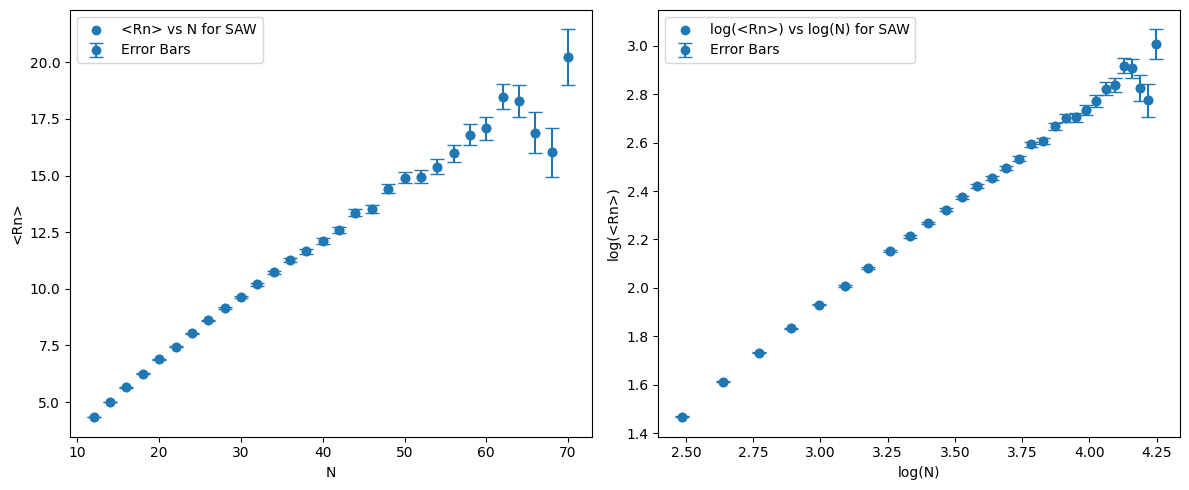

In [13]:
x_rn = data[:,0]
y_rn = data[:,3]
error_rn = data[:,6]
log_xrn =np.log(x_rn)
log_yrn =np.log(y_rn)
log_error =error_rn / y_rn

# Create two subplots for the plots
plt.figure(figsize=(12, 5))
#SAW Generated by the NRRW Walk Approach

# Plot x = N  vs y = Average distance for each N
plt.subplot(121)
plt.scatter(x_rn, y_rn, marker='o', label='<Rn> vs N for SAW')
plt.errorbar(x_rn, y_rn, yerr=error_rn, fmt='o', capsize=5, label='Error Bars')
plt.xlabel('N')
plt.ylabel('<Rn>')
plt.legend()

# Plot log(x) vs log(y)
plt.subplot(122)
plt.scatter(log_xrn, log_yrn, marker='o', label='log(<Rn>) vs log(N) for SAW')
plt.errorbar(log_xrn , log_yrn , yerr = log_error, fmt = 'o', capsize =5 , label ='Error Bars')
plt.xlabel('log(N)')
plt.ylabel('log(<Rn>)')
plt.legend()
plt.tight_layout()
plt.show()